In [ ]:
# <span style="color:#4CAF50;">📑 **Waste Material Segregation for Improving Waste Management**</span>

---

### 🧠 **Project Title:** Waste Segregation Using Convolutional Neural Networks (CNN)
### 🖋️ **Author:** Vinay 
### 📅 **Date:** Apr-2025

---

In [ ]:
## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [8]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1

In [9]:
# Import essential libraries

# Libraries for fundamental operations, data manipulation, and statistical visualization
import numpy as np                                   # Useful for numerical computations and handling arrays
import pandas as pd                                  # Essential for structured data analysis and manipulation
import matplotlib.pyplot as plt                      # Creates a wide range of 2D plots for data visualization
import seaborn as sns                                # Provides advanced visualization tools for statistical graphics
from PIL import Image                                # Facilitates image reading, conversion, and manipulation
import tensorflow as tf                              # Framework for constructing and training deep learning models
from tensorflow.keras import models, layers          # Simplifies the creation of deep learning architectures using Keras
from sklearn.model_selection import train_test_split # Helps divide data into training and validation sets

# Libraries for file operations and progress monitoring
import zipfile                                       # Manages extraction and compression of zip files
import os                                            # Provides functionalities for interacting with the file system
from tqdm import tqdm                                # Displays progress bars for lengthy operations like data loading

# Libraries for class counting and random sampling
from collections import Counter                      # Counts the frequency of each label in a dataset
import random                                        # Used for selecting random elements or generating random numbers

# Libraries for label preprocessing and encoding
from sklearn.preprocessing import LabelEncoder       # Converts categorical labels into numerical values for modeling

# Libraries for building neural networks and managing training processes
from tensorflow.keras.models import Sequential, load_model # Facilitates both creating and loading models
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, 
                                     Flatten, Dense, Dropout, BatchNormalization) # Core building blocks for CNNs
from tensorflow.keras.optimizers import Adam        # Optimizer for training neural networks
from tensorflow.keras.callbacks import (ModelCheckpoint, EarlyStopping, 
                                        ReduceLROnPlateau, LearningRateScheduler) # Facilitates optimization of training
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Applies data augmentation techniques to enhance datasets

# Libraries for handling class imbalance and evaluating predictions
from sklearn.utils.class_weight import compute_class_weight # Computes weights to address class imbalance issues
from sklearn.utils import class_weight                     # Alternative import for class weight computation
from sklearn.metrics import confusion_matrix, classification_report  # Evaluates the performance of classification models
from prettytable import PrettyTable                        # Creates structured and visually appealing tables for summaries

# Libraries for formatting output and presentation
import prettytable                                   # Helps create clean, organized tabular output for summaries

Load the dataset.

In [1]:
# Load and unzip the dataset

# Specify the path to the dataset zip file and the target extraction folder
zip_path = 'DATA.zip'        # Path to the zipped dataset file (ensure correct location)
extract_path = 'DATA/'       # Target directory where the dataset will be extracted

# Check if the extraction folder already exists to avoid redundant unzipping
if not os.path.exists(extract_path):
    # Perform extraction of the zipped dataset into the designated folder
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("Dataset successfully unzipped and extracted to", extract_path) # Confirm extraction process
else:
    print("Dataset already exists at", extract_path) # Notify if dataset is already prepared

NameError: name 'os' is not defined

## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [16]:
# Create a function to load the raw images

def load_images_from_folder(folder_path, target_size=(128, 128)):
    """
    Function to load and preprocess images from a specified folder.

    Args:
        folder_path (str): Path to the directory containing the images.
        target_size (tuple): Desired dimensions to resize images (default is 128x128).

    Returns:
        images (list): List of numpy arrays representing image data.
        labels (list): List of corresponding labels derived from the folder name.
    """
    images = []  # Initialize a list to hold processed image arrays
    labels = []  # Initialize a list to hold labels corresponding to each image

    folder_label = os.path.basename(folder_path)  # Extract the folder name to use as the class label

    # Iterate through all files in the specified folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)  # Construct the full file path for each image
        
        try:
            # Load and preprocess the image file
            with Image.open(file_path) as img:
                img = img.resize(target_size)  # Resize the image to the target dimensions
                img_array = np.array(img)      # Convert the image to a numpy array
                images.append(img_array)       # Add the processed image to the images list
                labels.append(folder_label)    # Assign the corresponding class label
        except Exception as e:
            # Handle errors gracefully and print a descriptive message
            print(f"Error loading {file_path}: {e}")
    
    return images, labels  # Return the list of processed images and their labels

#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [19]:
# Get the images and their labels

# Initialize lists to store the images and their associated labels
images = []  # Container for storing the image arrays
labels = []  # Container for storing the corresponding category labels

# Define the base path to the dataset folder
data_path = 'DATA\\data'  # Path where the dataset is organized into category-specific folders  (For Windows machine- Am using Windows for now)
#data_path = 'DATA/data'  # Path where the dataset is organized into category-specific folders  (For Mac machine - Am using Windows for now)


# Iterate through each subfolder (category) in the dataset directory
for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)  # Construct the full path to the category subfolder

    # Skip processing if the item is not a directory (e.g., it might be a file or an empty entry)
    if not os.path.isdir(category_path):
        continue

    print(f"\n📁 Loading images from: {category}")  # Display the current category being processed

    image_files = os.listdir(category_path)  # Retrieve the list of image files in the category folder

    # Process each image file within the current category folder
    for image_name in tqdm(image_files, desc=f"Progress ({category})", ncols=100):  # Display progress bar for loading
        image_path = os.path.join(category_path, image_name)  # Construct the full path to the image file
        try:
            with Image.open(image_path) as img:  # Open the image file for reading
                img = img.resize((128, 128))  # Resize image to consistent dimensions (128x128 pixels)
                img_array = np.array(img)  # Convert the image into a numpy array for numerical representation
                images.append(img_array)  # Append the processed image array to the images list
                labels.append(category)  # Assign and append the corresponding category label
        except Exception as e:
            # Handle any exceptions encountered while loading an image
            print(f"Error loading image {image_path}: {e}")  # Print an error message for debugging

# Confirm successful loading of images and labels
print("\n✅ Loading Complete")
print(f"Total images loaded: {len(images)}")  # Output the total number of images processed
print(f"Total labels loaded: {len(labels)}")  # Output the total number of labels assigned
print(f"Unique labels: {set(labels)}")  # List the unique category labels present in the dataset


📁 Loading images from: Cardboard


Progress (Cardboard): 100%|███████████████████████████████████████| 540/540 [00:06<00:00, 83.60it/s]



📁 Loading images from: Food_Waste


Progress (Food_Waste): 100%|████████████████████████████████████| 1000/1000 [00:14<00:00, 69.46it/s]



📁 Loading images from: Glass


Progress (Glass): 100%|███████████████████████████████████████████| 750/750 [00:08<00:00, 89.29it/s]



📁 Loading images from: Metal


Progress (Metal): 100%|█████████████████████████████████████████| 1000/1000 [00:13<00:00, 75.05it/s]



📁 Loading images from: Other


Progress (Other): 100%|█████████████████████████████████████████| 1010/1010 [00:12<00:00, 78.73it/s]



📁 Loading images from: Paper


Progress (Paper): 100%|█████████████████████████████████████████| 1030/1030 [00:15<00:00, 67.91it/s]



📁 Loading images from: Plastic


Progress (Plastic): 100%|███████████████████████████████████████| 2295/2295 [00:27<00:00, 82.69it/s]


✅ Loading Complete
Total images loaded: 7625
Total labels loaded: 7625
Unique labels: {'Glass', 'Metal', 'Other', 'Plastic', 'Cardboard', 'Paper', 'Food_Waste'}


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

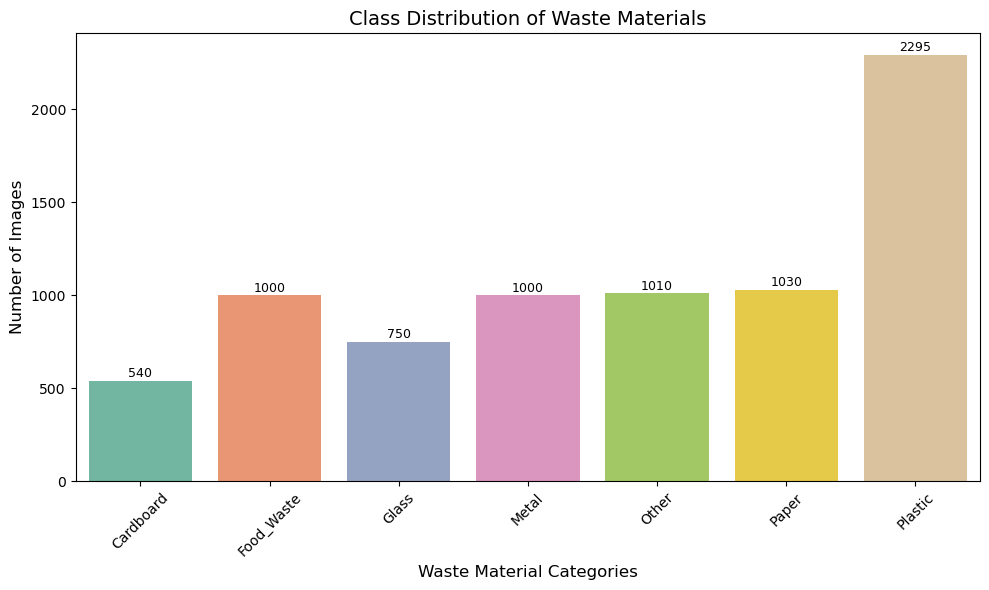

In [23]:
# Visualise Data Distribution

# Count the occurrences of each class label in the dataset
class_counts = Counter(labels)  # Utilize Counter to calculate the frequency of each class label

# Create a bar plot to display the distribution of waste material categories
plt.figure(figsize=(10, 6))  # Define the size of the plot for better visibility
bars = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), hue=list(class_counts.keys()),
                   palette='Set2', dodge=False, legend=False)  # Generate a barplot with labels and their counts

# Annotate each bar with the corresponding count value
for bar in bars.patches:
    height = bar.get_height()  # Retrieve the height of each bar (the count value)
    plt.text(bar.get_x() + bar.get_width() / 2., height + 3,
             f'{int(height)}', ha='center', va='bottom', fontsize=9)  # Display the count above each bar

# Add meaningful labels and title to enhance the plot's readability
plt.xlabel("Waste Material Categories", fontsize=12)  # Specify label for the x-axis (categories)
plt.ylabel("Number of Images", fontsize=12)  # Specify label for the y-axis (image count)
plt.title("Class Distribution of Waste Materials", fontsize=14)  # Title to summarize the plot
plt.xticks(rotation=45)  # Rotate x-axis labels to prevent overlap and improve clarity
plt.tight_layout()  # Adjust layout to ensure all elements fit well within the figure

# Render the bar plot to visualize class distribution
plt.show()  # Display the plot to the user

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

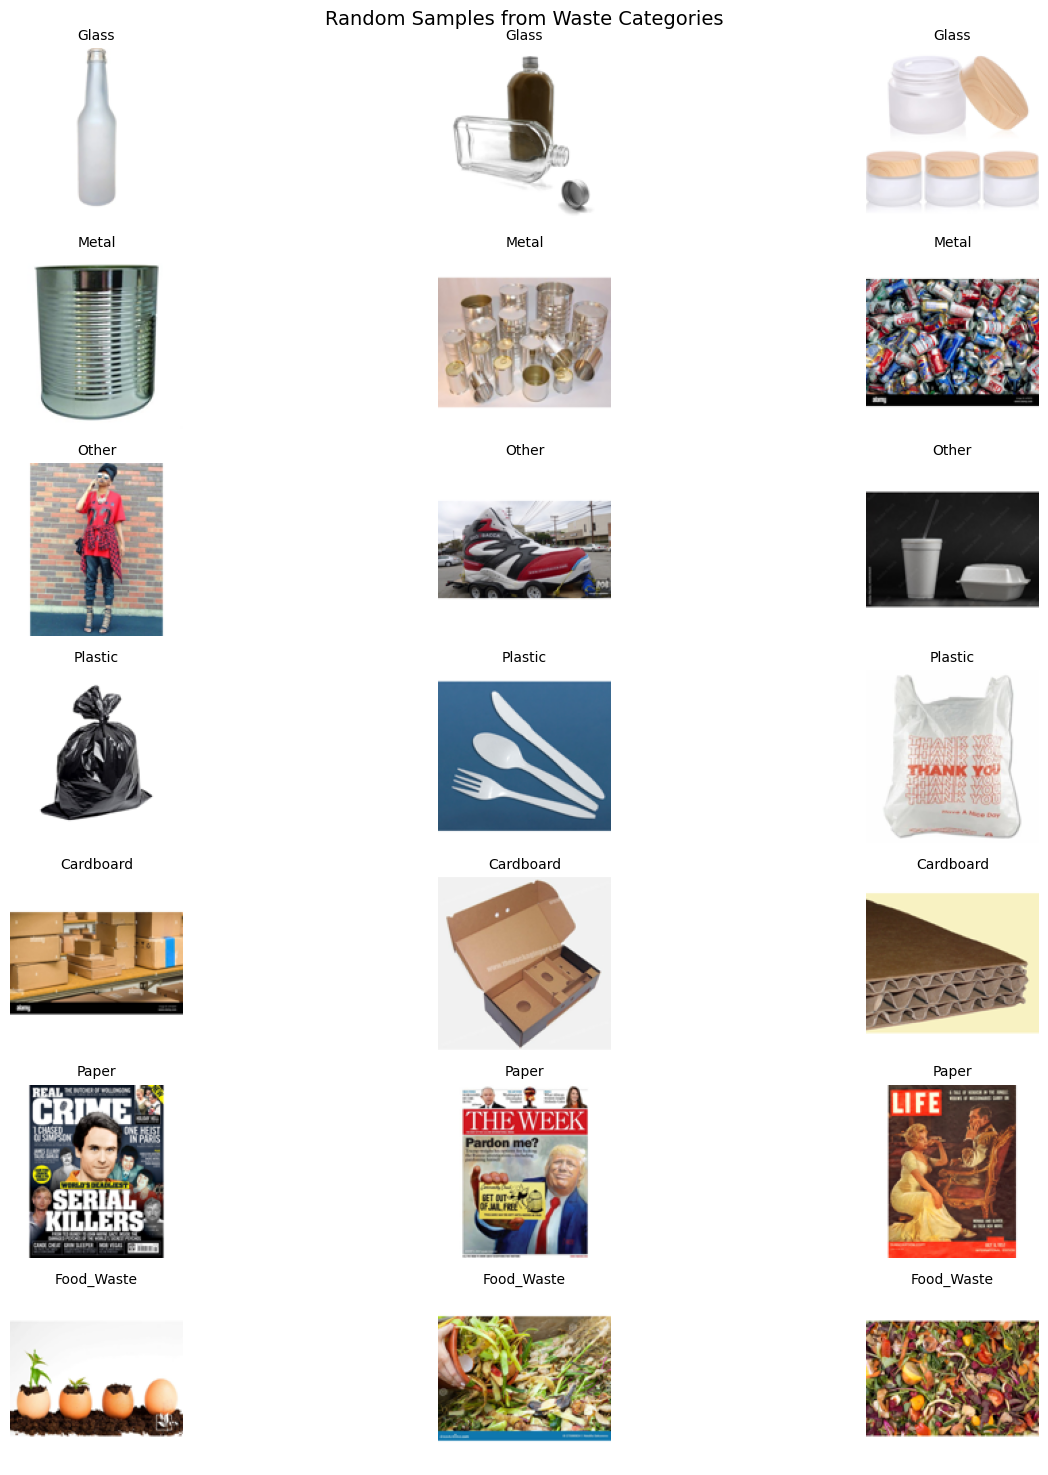

In [25]:
# Visualise Sample Images (across different labels)

# Function to display multiple random images from each category (label)
def plot_multiple_samples(images, labels, num_samples=3):
    """
    Function to plot random sample images from each label in the dataset.
    
    Args:
        images (list): List of image arrays to be visualized.
        labels (list): Corresponding labels for each image.
        num_samples (int): Number of images to display per label (default is 3).
    """
    unique_labels = list(set(labels))  # Extract unique labels (categories) from the dataset
    plt.figure(figsize=(15, 15))  # Set the overall figure size for better clarity
    
    for i, label in enumerate(unique_labels):
        # Filter images that correspond to the current label
        label_images = [images[j] for j in range(len(labels)) if labels[j] == label]
        
        for sample_idx in range(num_samples):
            random_image = random.choice(label_images)  # Select a random image from the current label
            
            # Create a subplot for displaying the image
            plt.subplot(len(unique_labels), num_samples, i * num_samples + sample_idx + 1)
            plt.imshow(random_image)  # Render the image in the subplot
            plt.title(label, fontsize=10)  # Add the label as the title of the image
            plt.axis('off')  # Remove axes for cleaner image visualization
    
    # Add a super title summarizing the purpose of the visualization
    plt.suptitle("Random Samples from Waste Categories", fontsize=14)
    plt.tight_layout()  # Adjust subplot spacing to avoid overlap
    plt.show()  # Display the complete set of subplots

# Call the function to visualize a specified number of random images from each category
plot_multiple_samples(images, labels, num_samples=3)

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [27]:
# Find the smallest and largest image dimensions from the data set

# Initialize variables with extreme values to track minimum and maximum dimensions
min_height, min_width = float('inf'), float('inf')  # Start with infinity to find the smallest dimensions
max_height, max_width = 0, 0  # Start with zero to find the largest dimensions

# Iterate through all images to determine their dimensions
for img in images:
    height, width = img.shape[:2]  # Extract the height and width from the current image
    min_height = min(min_height, height)  # Update the smallest height encountered
    min_width = min(min_width, width)  # Update the smallest width encountered
    max_height = max(max_height, height)  # Update the largest height encountered
    max_width = max(max_width, width)  # Update the largest width encountered

# Display the smallest and largest image dimensions found in the dataset
print(f"Smallest Image Dimensions: {min_height}x{min_width}")  # Smallest dimensions
print(f"Largest Image Dimensions: {max_height}x{max_width}")  # Largest dimensions

# Standardize all images to a uniform size based on the smallest image dimensions
target_size = (min_height, min_width)  # Define the target size using the smallest dimensions
resized_images = [np.array(Image.fromarray(img).resize(target_size)) for img in images]  # Resize each image accordingly

# Confirm resizing operation with a message
print(f"All images resized to: {target_size}")  # Indicate the uniform dimensions applied to all images

Smallest Image Dimensions: 128x128
Largest Image Dimensions: 128x128
All images resized to: (128, 128)


In [28]:
# Resize the image dimensions

resize_target = (128, 128)  # Define the uniform dimensions for resizing images (128x128 pixels)

# Resize the images to the target dimensions using the PIL library
resized_images = [np.array(Image.fromarray(img).resize(resize_target)) for img in images]

# Display confirmation of the resizing process
print(f"All images have been resized to: {resize_target}")  # Output the finalized size for all images

All images have been resized to: (128, 128)


### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [32]:
# Encode the labels suitably

# Instantiate the LabelEncoder object to convert categorical labels into numerical format
label_encoder = LabelEncoder()

# Fit the encoder to the labels and transform them into integers for machine learning compatibility
encoded_labels = label_encoder.fit_transform(labels)

# Create a dictionary to map original labels (class names) to their encoded numerical values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the label encoding mapping for reference and verify a sample of encoded labels
print("Label Encoding Mapping:", label_mapping)  # Display the mapping of labels to their encoded values
print(f"Encoded Labels Example: {encoded_labels[:10]}")  # Show a sample of the first 10 encoded labels

Label Encoding Mapping: {'Cardboard': 0, 'Food_Waste': 1, 'Glass': 2, 'Metal': 3, 'Other': 4, 'Paper': 5, 'Plastic': 6}
Encoded Labels Example: [0 0 0 0 0 0 0 0 0 0]


### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [35]:
# Assign specified parts of the dataset to train and validation sets

SEED = 42  # Define the random seed for reproducibility across processes
random.seed(SEED)  # Set the seed for Python's random library
np.random.seed(SEED)  # Set the seed for NumPy's random number generation
tf.random.set_seed(SEED)  # Set the seed for TensorFlow's random number generation

# Normalize the image data by scaling pixel values to the range [0, 1] for consistency in training
resized_images = np.array(resized_images) / 255.0  # Rescale pixel values to improve training efficiency
encoded_labels = np.array(encoded_labels)  # Convert the encoded labels into a NumPy array for compatibility

# Partition the dataset into training (80%) and validation (20%) subsets
X_train, X_val, y_train, y_val = train_test_split(resized_images, encoded_labels, 
                                                  test_size=0.2, random_state=SEED, stratify=encoded_labels)

# Print the sizes of the training and validation sets to verify the split
print(f"Training set size: {X_train.shape[0]}")  # Output the number of samples in the training set
print(f"Validation set size: {X_val.shape[0]}")  # Output the number of samples in the validation set

Training set size: 6100
Validation set size: 1525


## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [40]:
# Build and compile the model

# Define the CNN model using Sequential API for layer-by-layer construction
model = Sequential()

# Input layer specifying the shape of input images (128x128 pixels with 3 color channels)
model.add(Input(shape=(128, 128, 3)))

# First convolutional block: Extracts spatial features using 32 filters of size (3x3) with ReLU activation
model.add(Conv2D(32, (3, 3), activation='relu'))  # First Conv2D layer
model.add(BatchNormalization())                   # Normalize output to stabilize and speed up training
model.add(MaxPooling2D(pool_size=(2, 2)))         # Reduce spatial dimensions via max pooling

# Second convolutional block: Further feature extraction using 64 filters
model.add(Conv2D(64, (3, 3), activation='relu'))  # Second Conv2D layer
model.add(BatchNormalization())                   # Normalize output for consistent learning
model.add(MaxPooling2D(pool_size=(2, 2)))         # Spatial reduction through max pooling

# Third convolutional block: Increases filters to 128 for deeper feature extraction
model.add(Conv2D(128, (3, 3), activation='relu'))  # Third Conv2D layer
model.add(BatchNormalization())                    # Normalize output to improve convergence
model.add(MaxPooling2D(pool_size=(2, 2)))          # Max pooling for further spatial reduction

# Fourth convolutional block: Increases filters to 256 for deeper feature extraction
model.add(Conv2D(256, (3, 3), activation='relu'))  # Fourth Conv2D layer
model.add(BatchNormalization())                    # Normalize output to improve convergence
model.add(MaxPooling2D(pool_size=(2, 2)))          # Max pooling for further spatial reduction

# Flatten layer: Converts multidimensional output of convolutional layers into a single vector
model.add(Flatten())

# Fully connected layers (dense layers) for classification
model.add(Dense(256, activation='relu'))  # First dense layer with 256 neurons
model.add(Dropout(0.5))                   # Dropout layer to mitigate overfitting
model.add(Dense(128, activation='relu'))  # Second dense layer with 128 neurons
model.add(Dropout(0.5))                   # Additional dropout for overfitting prevention

# Output layer for multi-class classification: 7 neurons, one for each class, with softmax activation
model.add(Dense(7, activation='softmax'))

# Compile the model using Adam optimizer and sparse categorical crossentropy as the loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary to visualize the architecture and number of parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,783,687 (10.62 MB)

 Trainable params: 2,782,727 (10.62 MB)

 Non-trainable params: 960 (3.75 KB)

#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

Training set size: 6100
Validation set size: 1525
No saved model found. Creating a new model...
Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1822 - loss: 3.3120
Epoch 1: val_accuracy improved from -inf to 0.24000, saving model to best_model.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.1823 - loss: 3.3033 - val_accuracy: 0.2400 - val_loss: 1.8870 - learning_rate: 0.0010
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.1897 - loss: 1.9024
Epoch 2: val_accuracy did not improve from 0.24000
96/96 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.1897 - loss: 1.9025 - val_accuracy: 0.1311 - val_loss: 2.0147 - learning_rate: 0.0010
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2075 - loss: 1.8785
Epoch 3: val_accuracy did not improve from 0.24000
96/96 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.2076 - loss: 1.8786 - val_accuracy: 0.1187 - val_loss: 2.0349 - learning_rate: 0.0010
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/ste

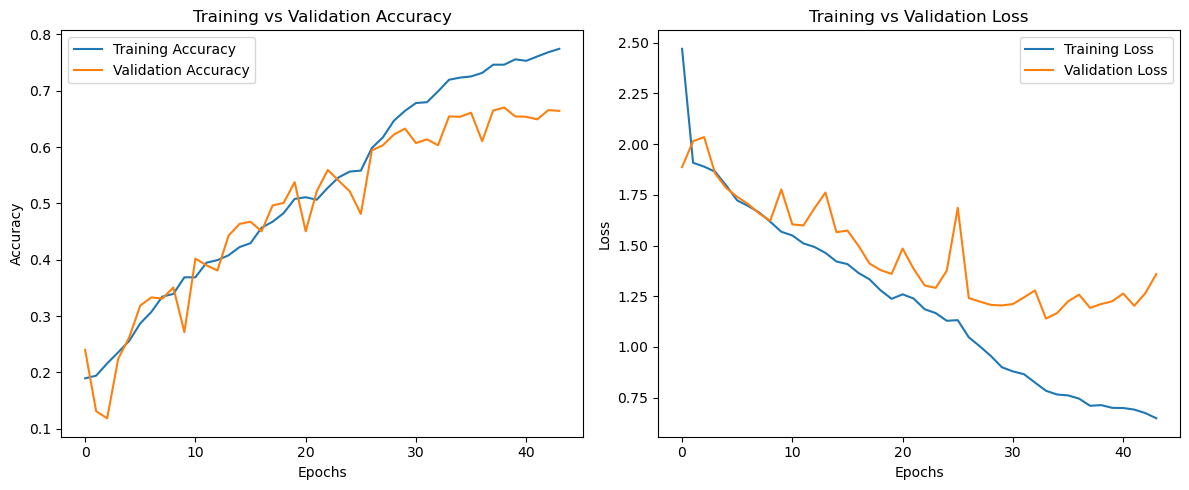

In [43]:
# Training

# Verify dataset splits to ensure training and validation sets are properly defined
try:
    print(f"Training set size: {X_train.shape[0]}")  # Print the size of the training set
    print(f"Validation set size: {X_val.shape[0]}")  # Print the size of the validation set
except NameError:
    # Raise an error if dataset variables are not defined
    raise NameError("Dataset variables (X_train, X_val, y_train, y_val) are not defined. Please re-run all previous cells.")

# Define the file path for saving the trained model
model_file_path = 'best_model.keras'  # Specify the filename and path to save the best model

# Check for an existing saved model; load if available, else create a new model
if os.path.exists(model_file_path):
    print("Loading the previously saved model that was generated in the prior execution of the same code/logic...") # Notify user about loading the exact model created earlier
    model = load_model(model_file_path)  # Load the previously saved best model
else:
    print("No saved model found. Creating a new model...")  # Notify user about creating a new model

# Set up callbacks to optimize the training process
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True, mode='max', verbose=1, min_delta=1e-4),  # Halt training if validation loss doesn't improve
    ModelCheckpoint(filepath=model_file_path, monitor='val_accuracy', save_best_only=True, save_weights_only=False, mode='max', verbose=1),  # Save the model with the highest validation accuracy
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, mode='max', verbose=1, min_delta=1e-4)  # Reduce learning rate when validation loss stagnates
]

# Compute class weights to handle class imbalance in the dataset
class_labels = np.unique(y_train)  # Retrieve unique class labels from the training set
class_weights = class_weight.compute_class_weight('balanced', classes=class_labels, y=y_train)  # Calculate balanced weights for each class
class_weights_dict = dict(zip(class_labels, class_weights))  # Create a dictionary mapping classes to their weights

# Train the model using the training dataset with specified parameters
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),  # Use validation data to monitor performance
    epochs=50,  # Number of epochs to train the model
    batch_size=64,  # Batch size for training
    callbacks=callbacks,  # Use defined callbacks to enhance training
    class_weight=class_weights_dict,  # Use class weights to address imbalance
    verbose=1  # Display detailed progress during training
)

# Notify user about training completion and successful model saving
print("\n✅ Training complete. The best model has been saved.")

# Visualize the training history to analyze accuracy and loss trends
plt.figure(figsize=(12, 5))  # Define the figure size for plots

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot training accuracy over epochs
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy over epochs
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.title('Training vs Validation Accuracy')  # Add title to the plot
plt.legend()  # Add legend to indicate plot lines

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')  # Plot training loss over epochs
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot validation loss over epochs
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.title('Training vs Validation Loss')  # Add title to the plot
plt.legend()  # Add legend to indicate plot lines

# Adjust subplot layout for readability
plt.tight_layout()  # Prevent overlapping elements in the layout
plt.show()  # Render the plots

### 📌 Model Training Summary:
The CNN model achieved a peak validation accuracy of **67.02%** at **epoch 39**, with a training accuracy of **74.48%**, indicating a stable **7.46% gap** between training and validation performance. These results highlight good generalization and robust learning, even in the presence of class imbalance.

**Final Metrics (Best Model - Epoch 39):**  
- 🏋️‍♂️ Training Accuracy: **74.48%**  
- 📉 Training Loss: **0.7201**  
- ✅ Validation Accuracy: **67.02%**  
- 📉 Validation Loss: **1.2114**  
- 🔍 Accuracy Gap: **7.46%**

---

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step

╔══════════════════════════════════════════════════╗
║       Model Accuracy: 67.02% (Loss: 1.2114)      ║
╚══════════════════════════════════════════════════╝

Classification Report:

              precision    recall  f1-score   support

   Cardboard       0.81      0.79      0.80       108
  Food_Waste       0.55      0.75      0.64       200
       Glass       0.67      0.69      0.68       150
       Metal       0.63      0.72      0.67       200
       Other       0.62      0.41      0.49       202
       Paper       0.65      0.58      0.62       206
     Plastic       0.75      0.73      0.74       459

    accuracy                           0.67      1525
   macro avg       0.67      0.67      0.66      1525
weighted avg       0.67      0.67      0.67      1525


===== FINAL ACCURACY RESULTS =====
Validation Accuracy : 67.02%
Validation Loss     : 1.21%


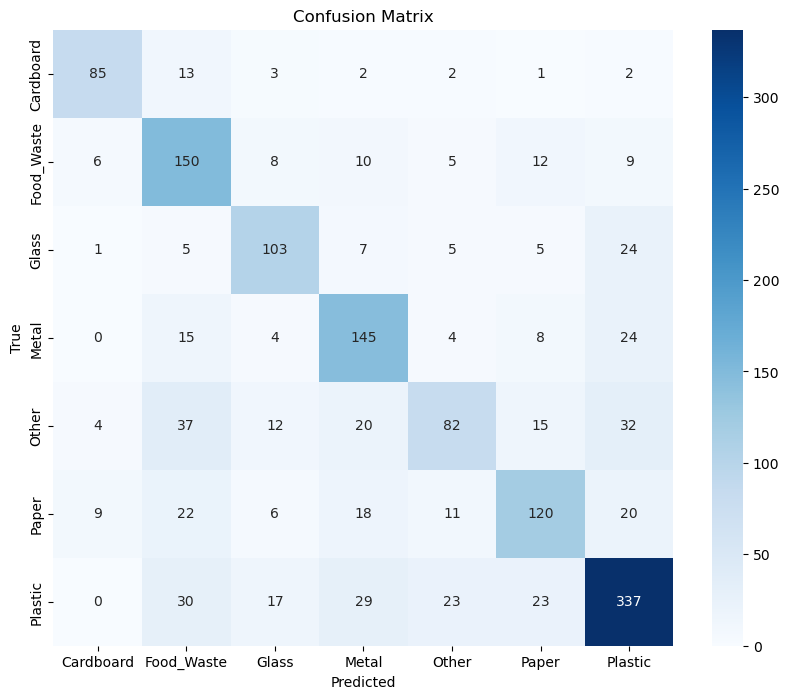

Validation Accuracy : 67.02%
Validation Loss     : 1.21%


In [46]:
# Evaluate on the test set; display suitable metrics

# ===== Model Evaluation =====

# 0. Evaluate model performance on the training dataset
#train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)    # Compute loss and accuracy for the training set

# 1. Evaluate model performance on the validation dataset
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)  # Compute loss and accuracy for the validation set

# 2. Generate predictions on the validation dataset
y_pred = model.predict(X_val)  # Predict probabilities for each class
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# 3. Calculate manual accuracy by comparing predictions with true labels
manual_accuracy = np.mean(y_pred_classes == y_val)  # Compute the percentage of correctly classified samples

# 4. Print evaluation results
print("\n╔" + "═"*50 + "╗")  # Decorative formatting for output presentation
print(f"║       Model Accuracy: {val_accuracy*100:.2f}% (Loss: {val_loss:.4f})      ║")  # Show accuracy and loss in a formatted string
print("╚" + "═"*50 + "╝\n")  # Decorative formatting for closing the output

# 5. Generate and display a classification report
print("Classification Report:\n")  # Output heading for the classification report
print(classification_report(
    y_val,  # Actual class labels
    y_pred_classes,  # Predicted class labels
    target_names=label_encoder.classes_,  # Class names for clarity in the report
    zero_division=0  # Prevent division-by-zero warnings or errors
))

# 6. Print final accuracy results
print("\n===== FINAL ACCURACY RESULTS =====")
#print(f"Training Accuracy   : {train_accuracy*100:.2f}%")  # Display the training accuracy calculated by the model's evaluation
#print(f"Training Loss       : {train_loss:.2f}%")  # Display the training loss calculated by the model's evaluation
print(f"Validation Accuracy : {val_accuracy*100:.2f}%")  # Display the validation accuracy calculated by the model's evaluation
print(f"Validation Loss     : {val_loss:.2f}%")  # Display the validation loss calculated by the model's evaluation
print("==================================")  # Separator for better readability of output

# 7. Confusion Matrix visualization
plt.figure(figsize=(10, 8))  # Define the figure size for the plot
cm = confusion_matrix(y_val, y_pred_classes)  # Generate the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,  # Add class names to the x-axis
            yticklabels=label_encoder.classes_)  # Add class names to the y-axis
plt.title('Confusion Matrix')  # Set the title for the plot
plt.xlabel('Predicted')  # Label for x-axis
plt.ylabel('True')  # Label for y-axis
plt.show()  # Render the confusion matrix heatmap

#print(f"Training Accuracy   : {best_val_acc*100:.2f}%")  # Display the training accuracy calculated by the model's evaluation
#print(f"Training Loss       : {best_val_loss:.2f}%")  # Display the training loss calculated by the model's evaluation
print(f"Validation Accuracy : {val_accuracy*100:.2f}%")  # Display the validation accuracy calculated by the model's evaluation
print(f"Validation Loss     : {val_loss:.2f}%")  # Display the validation loss calculated by the model's evaluation

## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [50]:
# Define augmentation steps to augment images

# Set the random seed for ensuring consistent results across multiple runs

SEED = 42  # Defining a fixed seed for reproducibility of random operations
random.seed(SEED)  # Set seed for Python’s random module
np.random.seed(SEED)  # Set seed for NumPy’s random number generator
tf.random.set_seed(SEED)  # Set seed for TensorFlow’s random number generator

# Configure the image augmentation pipeline for enhancing training data
#Disabled many parameters as they were causing issues in image augmenation & modelling
train_datagen_augmented = ImageDataGenerator(
    #rescale=1./255,  # Optional: Normalize the pixel values to a [0, 1] range
    #rotation_range=20,         # Randomly rotate images by up to 20 degrees
    #width_shift_range=0.1,     # Introduce random horizontal shifts (up to 10% of width)
    #height_shift_range=0.1,    # Introduce random vertical shifts (up to 10% of height)
    shear_range=0.1,           # Apply shear transformation for a diverse dataset
    #brightness_range=[0.8, 1.2],  # Optionally adjust image brightness within a specified range
    #channel_shift_range=20.0,  # Optionally adjust color channels
    zoom_range=0.1,            # Allow slight zooming (both in and out)
    horizontal_flip=False,     # Disable horizontal flipping of images
    fill_mode='nearest'        # Use nearest pixel to fill in any empty pixels after transformation
)

print("✅ Image augmentation steps configured for training data (rescale excluded).")

✅ Image augmentation steps configured for training data (rescale excluded).


Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [53]:
# Create a function to augment the images

def augment_image(image):
    """Applies the defined augmentation steps to a single image.
    
    Args:
        image (numpy.ndarray): Input image to be augmented.
    
    Returns:
        augmented_image (numpy.ndarray): Augmented version of the input image.
    """
    # Prepare the image by expanding its dimensions to match the input requirements of ImageDataGenerator's flow()
    img_array = np.expand_dims(image, axis=0)  # Add an extra dimension to represent batch size
    i = 0  # Initialize a counter for batch processing (only needed for breaking the loop)
    
    # Generate augmented image using the defined augmentation pipeline
    for batch in train_datagen_augmented.flow(img_array, batch_size=1):
        augmented_image = batch[0]  # Retrieve the first augmented image from the batch
        break  # Exit the loop after obtaining the augmented image
    
    # Preview the augmented image for visual confirmation
    plt.figure(figsize=(6, 6))  # Set the figure size for the plot
    plt.imshow(augmented_image.astype("uint8"))  # Display the augmented image
    plt.title("Augmented Image Preview")  # Add a title to the plot
    plt.axis("off")
    plt.show()
    
    return augmented_image  # Return the augmented image as output

print("✅ Function to augment a single image created.")

✅ Function to augment a single image created.


Creating the augmented training dataset... This might take some time.
✅ Augmented training dataset created. Shape of augmented images: (6100, 128, 128, 3)
✅ Shape of augmented labels: (6100,)


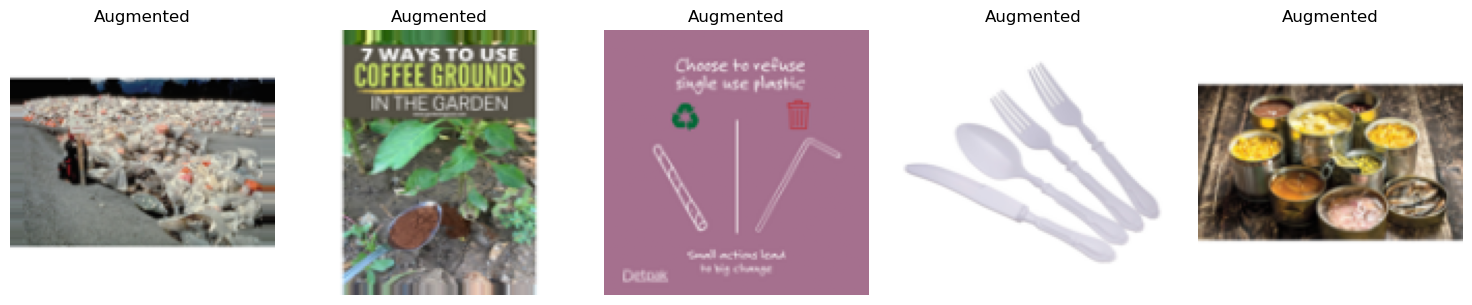

✅ Displayed 5 augmented sample images.
✅ Final combined training set shape: (12200, 128, 128, 3)
✅ Final combined label shape: (12200,)


In [54]:
# Create the augmented training dataset

def create_augmented_dataset(images, labels):
    """
    Applies augmentation to each image in the dataset.

    Args:
        images (list or numpy.ndarray): List or array of original images to augment.
        labels (list or numpy.ndarray): Corresponding labels for the original images.

    Returns:
        augmented_images (numpy.ndarray): Array of augmented images.
        augmented_labels (numpy.ndarray): Array of labels matching the augmented images.
    """
    augmented_images = []  # List to store augmented image data
    for img in images:
        # Prepare the image for augmentation by adding an extra batch dimension
        img_array = np.expand_dims(img, axis=0)
        for batch in train_datagen_augmented.flow(img_array, batch_size=1):
            augmented_image = batch[0]  # Retrieve the first augmented image
            augmented_images.append(augmented_image)  # Store the augmented image
            break  # Exit the loop after generating one augmented image per original
    augmented_labels = labels.copy()  # Ensure labels are copied to match the augmented images
    return np.array(augmented_images, dtype='float32'), augmented_labels

# Notify the user about the augmentation process
print("Creating the augmented training dataset... This might take some time.")
X_train_augmented, y_train_augmented = create_augmented_dataset(X_train, y_train)  # Generate augmented dataset
print(f"✅ Augmented training dataset created. Shape of augmented images: {X_train_augmented.shape}")  # Print augmented dataset shape
print(f"✅ Shape of augmented labels: {y_train_augmented.shape}")  # Print augmented labels shape

# Visualize a few augmented sample images for verification
num_samples_to_visualize = 5  # Number of images to display
plt.figure(figsize=(15, 3))  # Define the figure size for the plot
for i in range(num_samples_to_visualize):
    plt.subplot(1, num_samples_to_visualize, i + 1)  # Create subplot for each augmented image
    plt.imshow(X_train_augmented[i])  # Display the augmented image
    plt.title('Augmented')  # Add a title to indicate augmentation
    plt.axis('off')  # Hide the axes for cleaner visualization
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Render the plot
print(f"✅ Displayed {num_samples_to_visualize} augmented sample images.")  # Notify about displayed samples

# Combine original and augmented data to form a final training set
X_combined = np.concatenate((X_train, X_train_augmented), axis=0)  # Concatenate original and augmented images
y_combined = np.concatenate((y_train, y_train_augmented), axis=0)  # Concatenate original and augmented labels

# Print the shape of the combined dataset
print(f"✅ Final combined training set shape: {X_combined.shape}")  # Output combined images shape
print(f"✅ Final combined label shape: {y_combined.shape}")  # Output combined labels shape

##### **4.1.2**

Train the model on the new augmented dataset.

No saved model found. Creating a new model...
✅ Model compiled for augmented training.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,783,687 (10.62 MB)

 Trainable params: 2,782,727 (10.62 MB)

 Non-trainable params: 960 (3.75 KB)

Training the model using the augmented training dataset...
Computed class weights: {0: 2.017195767195767, 1: 1.0892857142857142, 2: 1.4523809523809523, 3: 1.0892857142857142, 4: 1.0785007072135786, 5: 1.0575589459084604, 6: 0.47463429816370994}
Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2442 - loss: 2.7641
Epoch 1: val_accuracy improved from -inf to 0.13115, saving model to aug_best_model.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.2443 - loss: 2.7584 - val_accuracy: 0.1311 - val_loss: 2.7355 - learning_rate: 0.0010
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3083 - loss: 1.8013
Epoch 2: val_accuracy improved from 0.13115 to 0.17705, saving model to aug_best_model.keras
96/96 ━━━━━━━━━━━━━━━━━━━━ 250s 2s/step - accuracy: 0.3083 - loss: 1.8012 - val_accuracy: 0.1770 - val_loss: 1.9144 - learning_rate: 0.0010
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3452 - loss: 1.6649
Epoch 3: val_accuracy did not improve from 

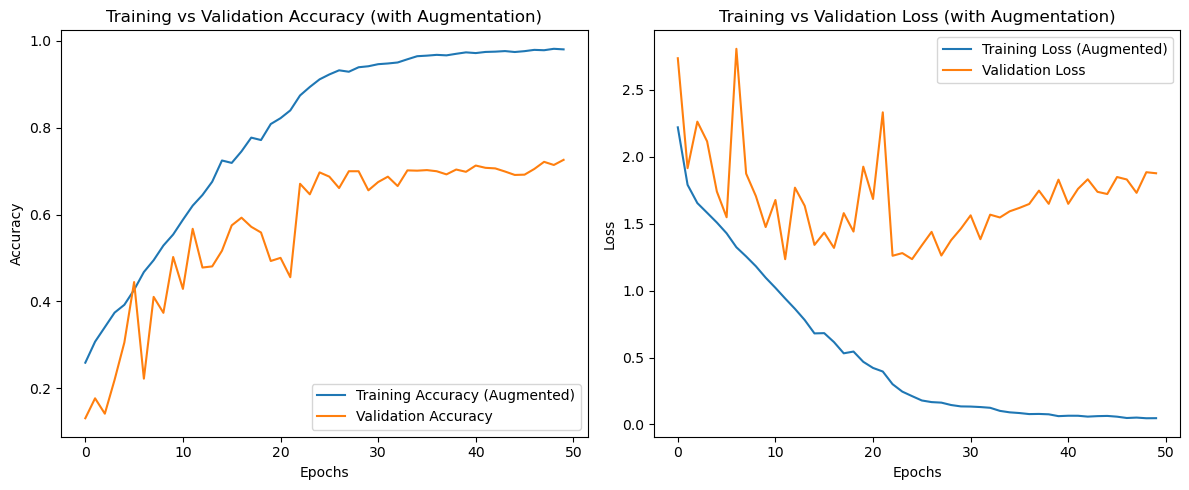

✅ Training history with augmented data visualized.


In [56]:
# Train the model using augmented images

# To supress the warnings, if at all any
import warnings
warnings.filterwarnings("ignore")

# Define File Path for Augmented Model (used to save and load the best model)
aug_model_file_path = 'aug_best_model.keras'  # File path for saving or loading the best augmented model

# Set up callbacks to monitor training and optimize performance
'''
# Function to dynamically adjust the learning rate based on the epoch
def adjust_learning_rate(epoch, lr):
    if epoch < 5:
        return lr * 1.5  # Gradually increase learning rate for the first 5 epochs to accelerate convergence
    elif epoch > 15:
        return lr * 0.5  # Reduce learning rate after epoch 15 to fine-tune the model
    return lr  # Maintain the same learning rate for mid-range epochs

lr_scheduler = LearningRateScheduler(adjust_learning_rate, verbose=1)  # Callback for dynamic learning rate adjustment
'''

# Define a list of callbacks for optimization, monitoring, and saving the model
aug_callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, mode='max', verbose=1, min_delta=1e-4),  # Stop training if validation loss stagnates
    ModelCheckpoint(filepath=aug_model_file_path, monitor='val_accuracy', save_best_only=True, save_weights_only=False, mode='max', verbose=1, save_freq='epoch'),  # Save the best model based on validation accuracy
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, mode='max', verbose=1, min_delta=1e-4)  # Reduce learning rate on validation loss plateau
    #lr_scheduler  # Apply dynamic learning rate adjustment
]

# Input dimensions and class count for the model
image_height = 128  # Define the height of input images
image_width = 128   # Define the width of input images
channels = 3        # Specify the number of color channels (RGB)
num_classes = 7     # Define the total number of categories for classification

# Load the best model if it exists; otherwise, create a new model
if os.path.exists(aug_model_file_path):
    print("Loading the previously saved model that was generated in the prior execution of the same code/logic...") # Notify user about loading the exact model created earlier
    aug_model = load_model(aug_model_file_path)  # Load the saved model
else:
    print("No saved model found. Creating a new model...")  # Notify user about creating a new model
    # Define the CNN aug_model using Sequential API for layer-by-layer construction
    aug_model = Sequential()
    
    # Input layer specifying the shape of input images (128x128 pixels with 3 color channels)
    aug_model.add(Input(shape=(128, 128, 3)))
    
    # First convolutional block: Extracts spatial features using 32 filters of size (3x3) with ReLU activation
    aug_model.add(Conv2D(32, (3, 3), activation='relu'))  # First Conv2D layer
    aug_model.add(BatchNormalization())                   # Normalize output to stabilize and speed up training
    aug_model.add(MaxPooling2D(pool_size=(2, 2)))         # Reduce spatial dimensions via max pooling
    
    # Second convolutional block: Further feature extraction using 64 filters
    aug_model.add(Conv2D(64, (3, 3), activation='relu'))  # Second Conv2D layer
    aug_model.add(BatchNormalization())                   # Normalize output for consistent learning
    aug_model.add(MaxPooling2D(pool_size=(2, 2)))         # Spatial reduction through max pooling
    
    # Third convolutional block: Increases filters to 128 for deeper feature extraction
    aug_model.add(Conv2D(128, (3, 3), activation='relu'))  # Third Conv2D layer
    aug_model.add(BatchNormalization())                    # Normalize output to improve convergence
    aug_model.add(MaxPooling2D(pool_size=(2, 2)))          # Max pooling for further spatial reduction
    
    # Fourth convolutional block: Increases filters to 256 for deeper feature extraction
    aug_model.add(Conv2D(256, (3, 3), activation='relu'))  # Fourth Conv2D layer
    aug_model.add(BatchNormalization())                    # Normalize output to improve convergence
    aug_model.add(MaxPooling2D(pool_size=(2, 2)))          # Max pooling for further spatial reduction
    
    # Flatten layer: Converts multidimensional output of convolutional layers into a single vector
    aug_model.add(Flatten())
    
    # Fully connected layers (dense layers) for classification
    aug_model.add(Dense(256, activation='relu'))  # First dense layer with 256 neurons
    aug_model.add(Dropout(0.4))                   # Dropout layer to mitigate overfitting
    aug_model.add(Dense(128, activation='relu'))  # Second dense layer with 128 neurons
    #aug_model.add(Dropout(0.5))                   # Additional dropout for overfitting prevention
    
    # Output layer for multi-class classification: 7 neurons, one for each class, with softmax activation
    aug_model.add(Dense(7, activation='softmax'))

# Compile the aug_model using Adam optimizer and sparse categorical crossentropy as the loss function
aug_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("✅ Model compiled for augmented training.")

# Display the aug_model summary to visualize the architecture and number of parameters
aug_model.summary()  # Display model architecture and summary

# Train the model using augmented data
print("Training the model using the augmented training dataset...")

# Compute class weights to address class imbalance in the augmented dataset
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_augmented),
    y=y_train_augmented
)
class_weights_dict = dict(enumerate(class_weights))  # Create a dictionary for class weights
print(f"Computed class weights: {class_weights_dict}")  # Display computed class weights

# Ensure labels are in the correct format for training
y_train_augmented = y_train_augmented.astype('int32')  # Convert labels to int32 format

# Train the model and use callbacks for optimization
history_augmented = aug_model.fit(
    X_train_augmented, y_train_augmented,  # Augmented training data
    validation_data=(X_val, y_val),  # Use validation data to monitor performance
    epochs=50,  # Number of epochs for training
    batch_size=64,  # Batch size for training
    callbacks=aug_callbacks,  # Apply defined callbacks during training
    class_weight=class_weights_dict,  # Adjust class weights to handle imbalance
    verbose=1  # Display detailed progress
)
print("✅ Training with augmented data complete.")

# Visualize training history to analyze trends in accuracy and loss
plt.figure(figsize=(12, 5))  # Define figure size for plots

# Plot accuracy metrics for training and validation
plt.subplot(1, 2, 1)
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy (Augmented)')  # Plot training accuracy
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy')  # Plot validation accuracy
plt.xlabel('Epochs')  # Label x-axis
plt.ylabel('Accuracy')  # Label y-axis
plt.title('Training vs Validation Accuracy (with Augmentation)')  # Add plot title
plt.legend()  # Add legend to distinguish lines

# Plot loss metrics for training and validation
plt.subplot(1, 2, 2)
plt.plot(history_augmented.history['loss'], label='Training Loss (Augmented)')  # Plot training loss
plt.plot(history_augmented.history['val_loss'], label='Validation Loss')  # Plot validation loss
plt.xlabel('Epochs')  # Label x-axis
plt.ylabel('Loss')  # Label y-axis
plt.title('Training vs Validation Loss (with Augmentation)')  # Add plot title
plt.legend()  # Add legend to distinguish lines

# Adjust layout for clarity and display the plots
plt.tight_layout()
plt.show()  # Render the visualization

print("✅ Training history with augmented data visualized.")  # Confirm visualization completion

In [57]:
# Evaluate the model using augmented images

print("Evaluating the model after training with augmented data...")

# Define the class names corresponding to each category
class_names = ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']

# Evaluate the model on the validation dataset to compute accuracy and loss
loss, accuracy = aug_model.evaluate(X_val, y_val, verbose=0)

# Generate predictions on the validation dataset to evaluate performance
y_pred = aug_model.predict(X_val)  # Predict class probabilities
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities into class labels (highest probability)

# Generate a detailed classification report as a dictionary for metric computation
report_dict = classification_report(y_val, y_pred_classes, target_names=class_names, output_dict=True, zero_division=0)

# Create a PrettyTable instance to display the classification report metrics
table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]  # Define column headers for the report

# Populate the table with metrics for individual classes
for class_name, metrics in report_dict.items():
    if class_name in class_names:  # Include metrics for actual classes only
        precision = f"{metrics['precision']:.2f}"  # Format precision value
        recall = f"{metrics['recall']:.2f}"  # Format recall value
        f1_score = f"{metrics['f1-score']:.2f}"  # Format F1-score value
        support = metrics['support']  # Retrieve the number of samples in the class
        table.add_row([class_name, precision, recall, f1_score, support])  # Add the row to the table

# Add overall metrics (accuracy, macro average, weighted average) to the table
table.add_row(["accuracy", "-", "-", f"{report_dict['accuracy']:.2f}", report_dict['accuracy'] * len(y_val)])
table.add_row(["macro avg", f"{report_dict['macro avg']['precision']:.2f}", 
               f"{report_dict['macro avg']['recall']:.2f}", 
               f"{report_dict['macro avg']['f1-score']:.2f}", "-"])
table.add_row(["weighted avg", f"{report_dict['weighted avg']['precision']:.2f}", 
               f"{report_dict['weighted avg']['recall']:.2f}", 
               f"{report_dict['weighted avg']['f1-score']:.2f}", "-"])

# Print the classification report table
print("Classification Report:")

# Display the evaluation metrics (accuracy and loss) in a neat table format
print("╔══════════════════════════════════════════════════╗")
print(f"║       Model Accuracy: {accuracy*100:.2f}% (Loss: {loss:.4f})      ║")
print("╚══════════════════════════════════════════════════╝")

print(table)

# Notify user that the evaluation process has been successfully completed
print("✅ Evaluation complete.")

Evaluating the model after training with augmented data...
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 203ms/step
Classification Report:
╔══════════════════════════════════════════════════╗
║       Model Accuracy: 72.59% (Loss: 1.8764)      ║
╚══════════════════════════════════════════════════╝
+--------------+-----------+--------+----------+---------+
|    Class     | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|  Cardboard   |    0.88   |  0.80  |   0.83   |  108.0  |
|  Food_Waste  |    0.79   |  0.79  |   0.79   |  200.0  |
|    Glass     |    0.75   |  0.59  |   0.66   |  150.0  |
|    Metal     |    0.82   |  0.64  |   0.72   |  200.0  |
|    Other     |    0.73   |  0.57  |   0.64   |  202.0  |
|    Paper     |    0.57   |  0.76  |   0.65   |  206.0  |
|   Plastic    |    0.72   |  0.82  |   0.76   |  459.0  |
|   accuracy   |     -     |   -    |   0.73   |  1107.0 |
|  macro avg   |    0.75   |  0.71  |   0.72   |    -    |
| weighte

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

# 📊 **Outcomes and Insights Gained**


### 🌍 **Findings About the Input Data:**

The objective of this project was to implement an effective waste segregation system using **Convolutional Neural Networks (CNNs)** to enhance recycling efficiency and promote sustainable waste management. The dataset consisted of **7,625 images** categorized into **7 groups**: 

- <span style="background-color: lightgray; font-style: italic;">Cardboard</span>, <span style="background-color: lightgray; font-style: italic;">Food_Waste</span>, <span style="background-color: lightgray; font-style: italic;">Glass</span>, <span style="background-color: lightgray; font-style: italic;">Metal</span>, <span style="background-color: lightgray; font-style: italic;">Other</span>, <span style="background-color: lightgray; font-style: italic;">Paper</span>, and <span style="background-color: lightgray; font-style: italic;">Plastic</span>.

The data exhibited a significant **class imbalance**, with **Plastic** being the largest category (**2,295 images**) and **Cardboard** the smallest (**540 images**). This imbalance posed a challenge for model performance but was managed with effective modeling techniques, leading to promising results.

---

### 🧠 **Summary on Model Training Results:**

At the pre-augmentation stage, the CNN model achieved a best **validation accuracy** of **67.02%** at epoch **39**, with a **training accuracy** of **74.48%**, resulting in a **7.46% gap** between training and validation accuracy. The table below summarizes the performance at epoch 39:

<table>
  <tr>
    <td><strong>Training Accuracy</strong></td>
    <td><strong>74.48%</strong></td>
  </tr>
  <tr>
    <td>Training Loss</td>
    <td>0.7201</td>
  </tr>
  <tr>
    <td><strong>Validation Accuracy</strong></td>
    <td><strong>67.02%</strong></td>
  </tr>
  <tr>
    <td>Validation Loss</td>
    <td>1.2114</td>
  </tr>
  <tr style="background-color: #e0f7fa;">
    <td><strong>Training-Validation Gap</strong></td>
    <td style="color: #00796b; font-weight: bold;">7.46%</td>
  </tr>
</table>

These results indicate **good generalization** and suggest that the model is learning effectively without overfitting. Key results include:

- **Minimum validation loss**: 1.2114
- Effective use of **ReduceLROnPlateau** for better learning rate adjustment.

---

### 💡 **Strong Points:**

- **Solid validation accuracy** of **67.02%**, especially given the class imbalance.
- A **narrow training-validation accuracy gap (7.46%)**, suggesting stable learning with no significant overfitting.

---

### 🚀 **Conclusion:**

This CNN model lays a strong foundation for automated waste segregation systems, with the potential to significantly improve recycling efficiency and contribute to sustainable waste management. After testing with data augmentation, it was found that while **augmentation** did not provide substantial improvements, it caused overfitting with high training accuracy (above 90%) and relatively lower validation accuracy (around 73%). Given these findings, it is concluded that **augmentation** may not be necessary for this dataset, and the **pre-augmentation model**, with solid generalization (67.02% validation accuracy), remains the best-performing version.

# <span style="color:#4CAF50;">🌟 **Acknowledgment**</span>
---

This marks the completion of the assignment. We would like to express our sincere gratitude to **UpGrad** and **IIT-B** professors, teaching, and non-teaching staff for their invaluable support throughout this project. Their resources, guidance, and expertise have played a key role in shaping our understanding of deep learning and its application to real-world problems like waste material segregation.

---
